## Batch1 vs Batch 2 ctrl_vs_11mix top 200 genes

Importing libraries

In [1]:
import decoupler as dc
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Only needed for visualization:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from anndata import AnnData

Reading data from tsv Batch1 ctrl_vs_11mix IHWallGenes and Batch2 ctrl_vs_11mix IHWallGenes

Selecting only the TOP 100 GENES and the columns "log2FoldChange","pvalue","padj","gene_name"

In [2]:
# Batch1 ctrl_vs_11mix IHWallGenes and Batch2 ctrl_vs_11mix IHWallGenes
b1_ctrl_vs_11mix_all ="/data/projects/2021/MicrobialMetabolites/bacterial-supernatant/20_deseq2icbi/batch1/paired_grp/deseq2_ctrl_vs_11mix/11mix_ctrl_IHWallGenes.tsv"
b2_ctrl_vs_11mix_all = "/data/projects/2021/MicrobialMetabolites/bacterial-supernatant/20_deseq2icbi/batch2/paired_grp/deseq2_ctrl_vs_11mix/11mix_ctrl_IHWallGenes.tsv"

b1_ctrl_vs_11mix_all = pd.read_csv(b1_ctrl_vs_11mix_all, sep="\t")
b2_ctrl_vs_11mix_all = pd.read_csv(b2_ctrl_vs_11mix_all, sep="\t")

In [3]:
#B1 
b1_ctrl_vs_11mix_200 = b1_ctrl_vs_11mix_all.iloc[0:200,:]
b1_ctrl_vs_11mix_200 = b1_ctrl_vs_11mix_200[["log2FoldChange","pvalue","padj","gene_name"]]
# B2
b2_ctrl_vs_11mix_200 = b2_ctrl_vs_11mix_all.iloc[0:200,:]
b2_ctrl_vs_11mix_200 = b2_ctrl_vs_11mix_200[["log2FoldChange","pvalue","padj","gene_name"]]


Check that the genes only appear once 

In [4]:
b1_ctrl_vs_11mix_200["gene_name"].value_counts().max()

2

In [5]:
b2_ctrl_vs_11mix_200["gene_name"].value_counts().max()

1

Creating a dataframe for each batch with only gene_name information

In [6]:
b1_ctrl_vs_11mix_200_gene = pd.DataFrame(b1_ctrl_vs_11mix_200["gene_name"])

In [7]:
b1_ctrl_vs_11mix_200_gene

,gene_name
0,Selenom
1,Eml2
2,Atp2b4
3,Tnfaip2
4,Pllp
...,...
195,Utrn
196,Tmem54
197,Cyp3a13
198,Mpzl2


In [8]:
b2_ctrl_vs_11mix_200_gene = pd.DataFrame(b2_ctrl_vs_11mix_200["gene_name"])

In [9]:
b2_ctrl_vs_11mix_200_gene

,gene_name
0,Cxcl5
1,Igsf23
2,Ybx2
3,Lcn2
4,P3h4
...,...
195,Rgs2
196,Zcchc10
197,Tmem9
198,Degs2


Finding common elements between the 2 datasets (b1 and b2 ctrl_vs_11mix)

In [10]:
common_b1_b2_ctrl_vs_11mix = list(set(b1_ctrl_vs_11mix_200_gene.gene_name) & set(b2_ctrl_vs_11mix_200_gene.gene_name))

In [11]:
len(common_b1_b2_ctrl_vs_11mix)

44

In [12]:
# The union of the genes present in the All genes table from Batch1 and Batch2 
genes_universe = list(set(b1_ctrl_vs_11mix_all.gene_name) & set(b2_ctrl_vs_11mix_all.gene_name))

In [13]:
len(genes_universe)

15738

In [14]:
common_b1_b2_ctrl_vs_11mix

['Nfic',
 'Slc25a23',
 'Dnah2',
 'Pbp2',
 'Vill',
 'Bcorl1',
 'Sult4a1',
 'Ikbip',
 'Gm44275',
 'Slc4a7',
 'Il1rn',
 'Cxcl2',
 'Serpinb9b',
 'H2-DMa',
 'Prpf40b',
 'Ybx2',
 'Ubxn6',
 'Tmem9',
 'Fam3c',
 'Trp53i11',
 'Gstt1',
 'Cd68',
 'Zfhx3',
 'Ppa1',
 'Larp1b',
 'Tmem37',
 'Psmb10',
 'Casp1',
 'P3h4',
 'Prss32',
 '5730419F03Rik',
 'Krt6a',
 'Ppp4r1l-ps',
 'Gstm5',
 'Atp2b4',
 'Rundc3a',
 'Selenom',
 'Steap2',
 'Rnd2',
 'Pllp',
 '5930430L01Rik',
 'Lsm8',
 'Efna3',
 'Bex3']

Taking the original dataframes with all the information and selecting only the common genes

In [15]:
b1_common = b1_ctrl_vs_11mix_200[b1_ctrl_vs_11mix_200["gene_name"].isin(common_b1_b2_ctrl_vs_11mix)]
b1_common

,log2FoldChange,pvalue,padj,gene_name
0,2.071643,1.656087e-15,2.053267e-11,Selenom
2,1.750809,2.762797e-12,1.226861e-08,Atp2b4
4,-1.054247,3.238075e-11,4.020306e-08,Pllp
10,1.119034,3.657498e-10,3.550361e-07,Bex3
12,1.473642,1.627155e-09,2.723412e-06,Gstt1
13,1.426255,3.047840e-09,3.558320e-06,Ybx2
16,1.351152,3.723597e-09,3.094865e-06,Rnd2
19,1.132597,6.086673e-09,3.094865e-06,Gm44275
21,-0.947968,8.378982e-09,2.794934e-06,Il1rn
23,1.277153,1.570030e-08,7.876071e-06,Tmem9


In [16]:
b2_common = b2_ctrl_vs_11mix_200[b2_ctrl_vs_11mix_200["gene_name"].isin(common_b1_b2_ctrl_vs_11mix)]
b2_common

,log2FoldChange,pvalue,padj,gene_name
2,2.055145,1.150704e-14,5.891130e-11,Ybx2
4,2.661808,1.618199e-12,3.653247e-09,P3h4
6,2.395671,9.894686e-11,4.012838e-07,Selenom
9,1.611802,4.722131e-10,5.164460e-07,Rnd2
11,2.373628,2.223267e-09,2.091354e-06,Dnah2
12,1.518663,3.426106e-09,5.710878e-06,Pbp2
13,2.563825,3.501628e-09,2.462547e-06,5930430L01Rik
16,-1.599928,7.405407e-09,7.111074e-06,Psmb10
17,-1.219470,7.521412e-09,7.111074e-06,Serpinb9b
18,-2.003474,8.271054e-09,5.321069e-06,Krt6a


### Fisher exact test
Test if the number of common genes is larger than what would be obtained by chance

In [17]:
b1_and_b2 = len(common_b1_b2_ctrl_vs_11mix)
notb1_onlyb2 = len(b1_ctrl_vs_11mix_200) - b1_and_b2
notb2_onlyb1 = len(b1_ctrl_vs_11mix_200) - b1_and_b2
notb1_notb2 = len(genes_universe)
oddsratio, pvalue = fisher_exact([[b1_and_b2, notb1_onlyb2], [notb2_onlyb1, notb1_notb2]])
pvalue

8.034467797345497e-43

In [18]:
oddsratio

28.454635108481263

The p value is less than 5% (0.05), therefore we conclude that our observation is statistically significant. 
### This means that the number of intersected genes is higher than what we would expect by random chance.  

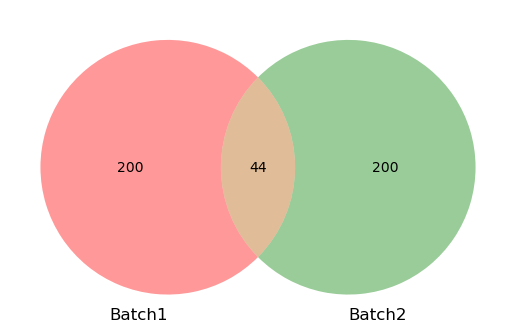

In [19]:
# Plot intersection
venn2(subsets = (len(b1_ctrl_vs_11mix_200), len(b2_ctrl_vs_11mix_200), len(common_b1_b2_ctrl_vs_11mix)), set_labels = ('Batch1', 'Batch2'))
plt.show()